### Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст

sex — пол (1 - мужчина, 0 - женщина)

cp — тип боли в груди (4 значения)

trestbps — артериальное давление в покое

chol — холестерин сыворотки в мг/дл

fbs — уровень сахара в крови натощак > 120 мг/дл

restecg — результаты электрокардиографии в покое (значения 0,1,2)

thalach — достигнута максимальная частота сердечных сокращений

exang — стенокардия, вызванная физической нагрузкой

oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

slope — наклон пикового сегмента ST при нагрузке

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [306]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [307]:
# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)

In [308]:
import pandas as pd
import matplotlib.pyplot as plt # библиотека визуализации
import seaborn as sns
import Handlers as hd
from sklearn import preprocessing # для нормализации, стандартизации

In [309]:
%matplotlib inline
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})

In [310]:
import warnings
warnings.filterwarnings('ignore')

In [311]:
from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

In [312]:
heart = pd.read_csv('data\heart.zip')

In [313]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [314]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [315]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [316]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [317]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [318]:
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 

trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. 

В таблице систолическое давление написано первым, перед дробной чертой.

In [319]:
# Возраст (лет)	Мужчины	Женщины
# до 20	123/76	116/72
# 21-30	126/79	120/75
# 31-40	129/81	127/80
# 41-50	135/83	137/84
# 51-60	142/85	144/85
# 61 и старше	142/80	159/85

In [320]:
def get_trestbps_mean(df):
    sex = df['sex']
    age = df['age']
    
    result = 0
    
    if sex:
        if age <= 20:
            result = 123
        elif 21 <= age <= 30:
            result = 126
        elif 31 <= age <= 40:
            result = 129
        elif 41 <= age <= 50:
            result = 135
        elif 51 <= age <= 60:
            result = 142
        elif age >= 61:
            result = 142
    else:
        if age <= 20:
            result = 116
        elif 21 <= age <= 30:
            result = 120
        elif 31 <= age <= 40:
            result = 127
        elif 41 <= age <= 50:
            result = 137
        elif 51 <= age <= 60:
            result = 144
        elif age >= 61:
            result = 159
    
    return result


In [321]:
heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)

In [322]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [323]:
heart['trestbps_mean'].loc[300]

142

In [324]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


Провожу анализ фитч

In [325]:
hd.get_columns_unique_info_df(heart)

,Column Name,Num Unique,Num Null,Type
0,age,41,0,int64
1,sex,2,0,int64
2,cp,4,0,int64
3,trestbps,49,0,int64
4,chol,152,0,int64
5,fbs,2,0,int64
6,restecg,3,0,int64
7,thalach,91,0,int64
8,exang,2,0,int64
9,oldpeak,40,0,float64


In [326]:
heart['sex'].value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

In [327]:
heart['cp'].value_counts(normalize=True)

0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: cp, dtype: float64

In [328]:
heart['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [329]:
heart['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [330]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [331]:
heart['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [332]:
heart['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [333]:
heart['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [334]:
heart['restecg'].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

In [335]:
heart['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [336]:
heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [337]:
heart['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [338]:
heart['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [339]:
heart['slope'].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [340]:
heart['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [341]:
heart['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [342]:
heart['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

К категориальным признакам отношу:

age — возраст. Непрерывный числовой признак

sex (Пол) - номинальный категориальный признак.

cp — тип боли в груди (4 значения). От 0 и до 3. Порядковый категориальный признак. Кодирую через Ordinal Encoding.

trestbps — артериальное давление в покое. Непрерывный числовой признак который изменяется в пределах 94-200.

chol — холестерин сыворотки в мг/дл. Непрерывный числовой признак который изменяется в пределах 126-564. При 152 уникальных значениях на выборку 303

fbs — уровень сахара в крови натощак > 120 мг/дл. Номинальный категориальный признак. Говорит есть ли превышение сахара или нет.

restecg — результаты электрокардиографии в покое (значения 0,1,2). Номинальный категориальный признак.

thalach — достигнута максимальная частота сердечных сокращений. Непрерывный числовой признак.

exang — стенокардия, вызванная физической нагрузкой. Номинальный категориальный признак. Есть или нет стенокардия.

slope — наклон пикового сегмента ST при нагрузке. Скорее всего порядковый категориальный признак, т.к. наклон навеное имеет значение. Кодирую через Ordinal Encoding.

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии. Порядковый категориальный признак, считается количество. Кодирую через Ordinal Encoding.

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект. Номинальный категориальный признак.

In [343]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


Курс дает следующий ответ на то что нужно кодировать:

cp - типа это номинальный категориальный признак, а не порядковый, а я считаю что тип боли это порядковый признак. АААА, это тип боли а не ее сила!

restecg - результаты электрокардиографии в покое (значения 0,1,2). Номинальный категориальный признак.

slope — наклон пикового сегмента ST при нагрузке. Я посчитал что это порядковый признак, а нет, номинальный. Угол же уже был преборазован в числа от 0 до 2. А изначалбно там были какие-то диапазоны чисел, а потом кодировка в 0, 1, 2.

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии. Опять номинальный категориальный признак, сосуды не в штуках. Было какое-то количество которое разделили на 4 группы по количеству и закодировали в 0, 1, 2, 3.

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект. Номинальный категориальный признак.

sex, , fbs, exand - номинальные категориальные признаки всего из 2х вариантов. 0 или 1.
Дополнительно кодировать не нужно. Когда всего два варианта раскодировка не нужна. 
Фактически признак описывается как полностью отсутствует 0, или полностью присутствует 1.




Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?

In [344]:
import category_encoders as ce

In [345]:
cols_to_encode = ['cp', 'restecg', 'slope', 'ca', 'thal']

In [346]:
encoder = ce.OneHotEncoder(cols=cols_to_encode)
ohe_bin = encoder.fit_transform(heart[cols_to_encode])

In [347]:
heart = pd.concat([heart, ohe_bin], axis=1)

In [348]:
heart.shape[1]

35

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [349]:
# Удаляю все категориальные номинальные признаки, которые уже раскодировал
# heart.drop(columns=cols_to_encode, axis=1, inplace=True)

In [350]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [351]:
# Отбираю числовые признаки для нормализации
col_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'trestbps_mean']

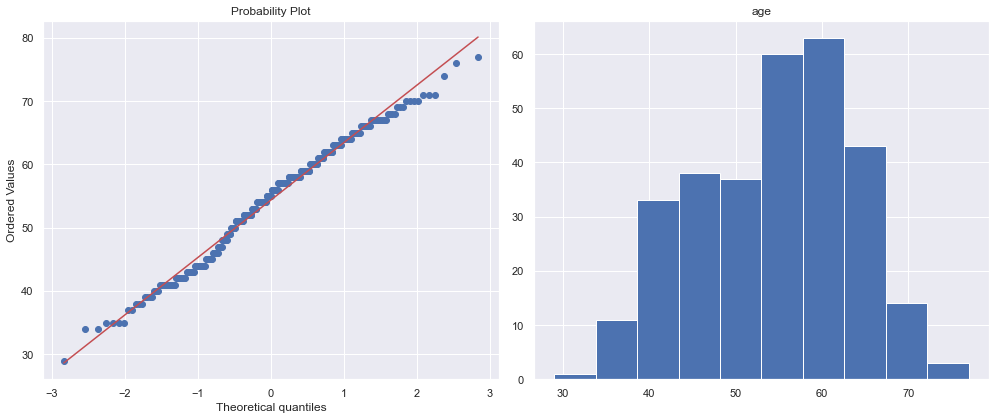

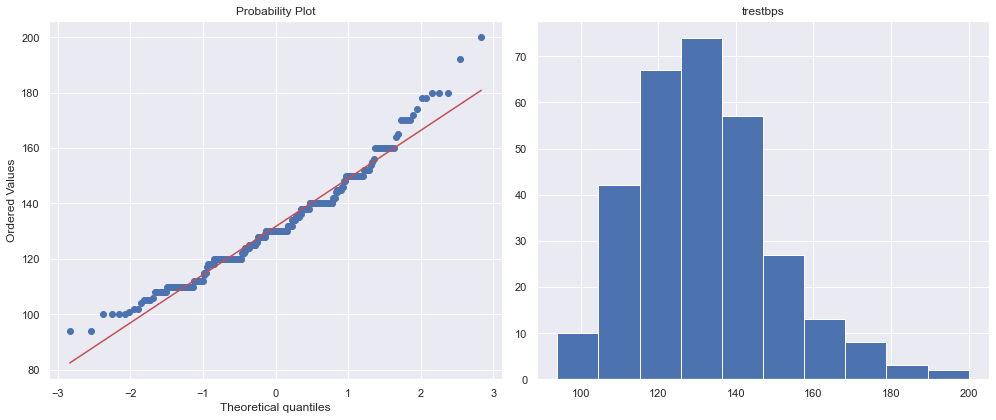

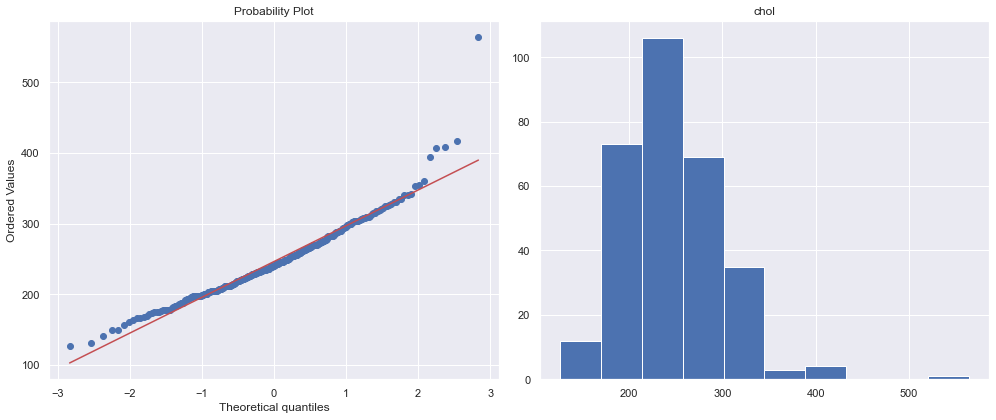

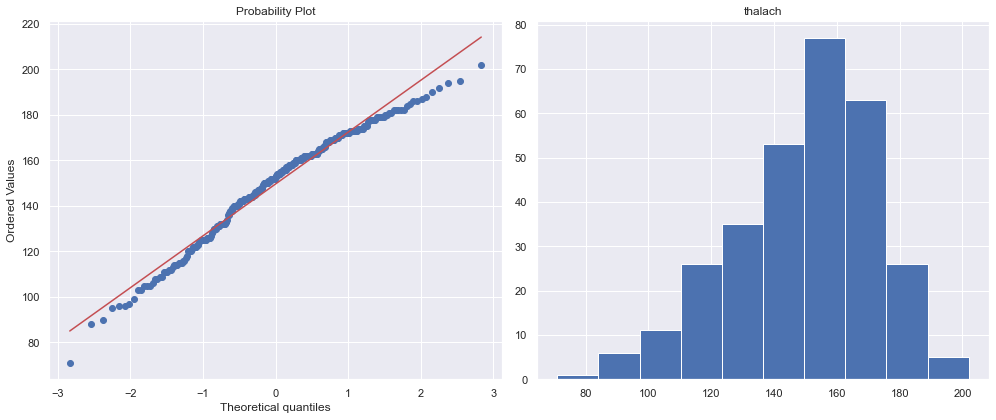

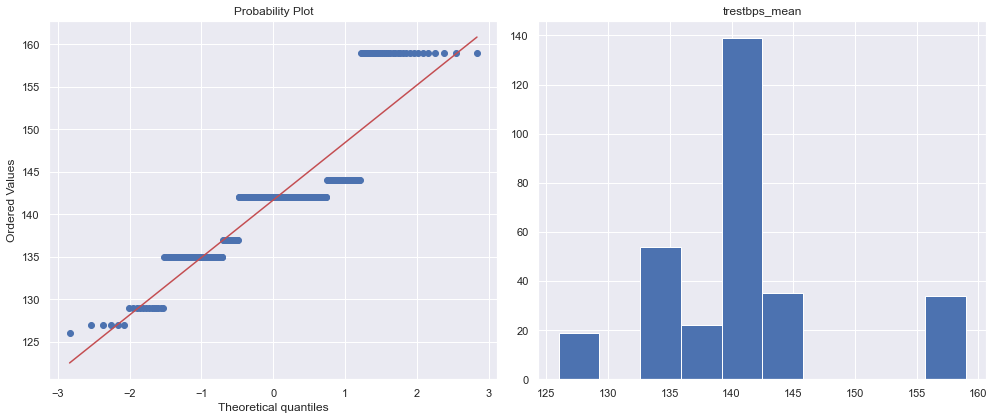

In [352]:
# Провожу оценку проверки нормальности распределения
for col in col_to_normalize:
    hd.Q_Q_plot(heart, col)

По визуальной оценке:

'age', 'thalach' считаю нормально распределенными и стандартизирую. Значения справа сверху не уходят по параболе вышел линиии регрессии.

'trestbps', 'chol' считаю не нормально распределенными и нормализую используя RobustScaler.

Хотя в подсказке к заданию написано что - Для необработанных данных следует использовать RobustScaler.

In [353]:
col_to_standart = ['age', 'thalach']
col_to_robust = ['trestbps', 'chol', 'trestbps_mean']

In [354]:
ss = preprocessing.StandardScaler()
standart = ss.fit_transform(heart[col_to_standart])

In [355]:
heart_standart = pd.DataFrame(standart, columns=col_to_standart)
heart_standart

,age,thalach
0,0.952197,0.015443
1,-1.915313,1.633471
2,-1.474158,0.977514
3,0.180175,1.239897
4,0.290464,0.583939
...,...,...
298,0.290464,-1.165281
299,-1.033002,-0.771706
300,1.503641,-0.378132
301,0.290464,-1.515125


In [356]:
rs = preprocessing.RobustScaler()
robust = rs.fit_transform(heart[col_to_robust])

In [357]:
heart_robust = pd.DataFrame(robust, columns=col_to_robust)
heart_robust

,trestbps,chol,trestbps_mean
0,0.75,-0.110236,0.0
1,0.00,0.157480,-2.6
2,0.00,-0.566929,-1.0
3,-0.50,-0.062992,0.0
4,-0.50,1.795276,0.4
...,...,...,...
298,0.50,0.015748,0.4
299,-1.00,0.377953,-1.4
300,0.70,-0.740157,0.0
301,0.00,-1.716535,0.0


In [358]:
# Удаляю из базового датафрейма изначальные фичи
heart.drop(columns=(col_to_standart + col_to_robust), axis=1, inplace=True)

In [359]:
# Добавляю стандартизованные и нормализованные фитчи
heart = pd.concat([heart, heart_standart, heart_robust], axis=1)
heart

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,...,ca_5,thal_1,thal_2,thal_3,thal_4,age,thalach,trestbps,chol,trestbps_mean
0,1,3,1,0,0,2.3,0,0,1,1,...,0,1,0,0,0,0.952197,0.015443,0.75,-0.110236,0.0
1,1,2,0,1,0,3.5,0,0,2,1,...,0,0,1,0,0,-1.915313,1.633471,0.00,0.157480,-2.6
2,0,1,0,0,0,1.4,2,0,2,1,...,0,0,1,0,0,-1.474158,0.977514,0.00,-0.566929,-1.0
3,1,1,0,1,0,0.8,2,0,2,1,...,0,0,1,0,0,0.180175,1.239897,-0.50,-0.062992,0.0
4,0,0,0,1,1,0.6,2,0,2,1,...,0,0,1,0,0,0.290464,0.583939,-0.50,1.795276,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,...,0,0,0,1,0,0.290464,-1.165281,0.50,0.015748,0.4
299,1,3,0,1,0,1.2,1,0,3,0,...,0,0,0,1,0,-1.033002,-0.771706,-1.00,0.377953,-1.4
300,1,0,1,1,0,3.4,1,2,3,0,...,0,0,0,1,0,1.503641,-0.378132,0.70,-0.740157,0.0
301,1,0,0,1,1,1.2,1,1,3,0,...,0,0,0,1,0,0.290464,-1.515125,0.00,-1.716535,0.0


В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [360]:
round(heart['chol'].std(), 6)

0.816232

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

In [361]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            303 non-null    int64  
 1   cp             303 non-null    int64  
 2   fbs            303 non-null    int64  
 3   restecg        303 non-null    int64  
 4   exang          303 non-null    int64  
 5   oldpeak        303 non-null    float64
 6   slope          303 non-null    int64  
 7   ca             303 non-null    int64  
 8   thal           303 non-null    int64  
 9   target         303 non-null    int64  
 10  old            303 non-null    int64  
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

<AxesSubplot:>

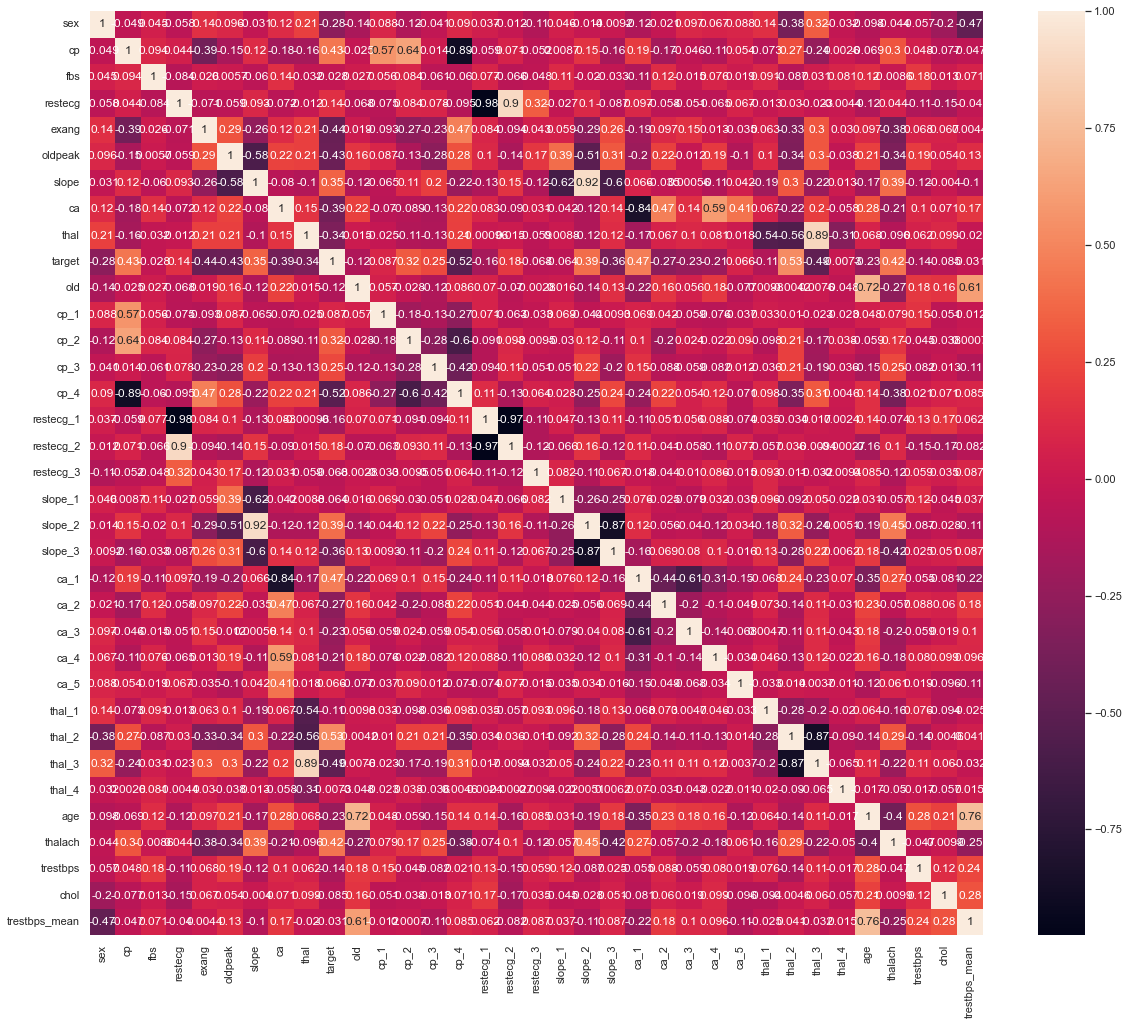

In [362]:
plt.figure(figsize=(20, 17))
sns.heatmap(heart.corr(), annot=True)